# Computing overlaps of knot cores with minimums

In [1]:
from datasets import Dataset, load_dataset
import pandas as pd
from tqdm import tqdm

In [2]:
PATCH_SIZE = 40
INPUT = f'/home/jovyan/data/proteins_m2/preds_{PATCH_SIZE}_minimums.csv'
OUTPUT_REDUCED = f'/home/jovyan/data/proteins_m2/preds_{PATCH_SIZE}_minimums_reduced.csv'

In [3]:
df_reduced = pd.read_csv(INPUT, sep=';')
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
5725,A0A3P6SS45,MRQRHFHVTVALVRRFSSAKENTDVTYYIPPKTFRPAYYHPMKPSQ...,NaN,NaN,NaN,NaN,NaN,112,466,ribosomal-mitochondrial
5726,A0A1U7S9S7,MAALRKKWSELCRLVQAESATAAAAAATAAAEAGLGPCYPPVVASV...,NaN,NaN,NaN,NaN,NaN,85,415,ribosomal-mitochondrial
5727,U1Q8C1,MRGLFPVDMSDGRAIRIQARNAVYPPAQAPNAVRLLADMELELQRV...,NaN,NaN,NaN,NaN,NaN,342,470,biosynthesis of lantibiotics
5728,A0A4Q3GPX1,VLYSATHQCRLVPRMASAYNILRSSHPLLRLLADLQYQGIQYQFLP...,NaN,NaN,NaN,NaN,NaN,317,421,biosynthesis of lantibiotics


Take only the sequences with a knot prediction:

In [4]:
# sequences that have at least some prediction:
df_reduced = df_reduced.loc[df_reduced['sequence_pred'].notnull()]
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
3460,A0A2L0EHF4,MRHFLTTMDYTRAEIEGLLERAQRFKRRPVDPRLKDRTLALVFFNP...,0.959550,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9595502614974976, 0.9151450991630554, 0.964...",55.0,0.407665,168,250,ATCase/OTCase
3461,A0A3C0HI14,MKHFLNTQDWSRAELDAVLDEAAVLKASKFGQQMAGKSIALVFFNP...,0.991351,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9913514852523804, 0.9928185939788818, 0.994...",20.0,0.772005,169,251,ATCase/OTCase
3462,A0A7C1D2E0,MNTALKGKHFITTQDWSIQELKTIFELAKQLKLDFARGKFSRQHAG...,0.846104,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.8461039662361145, 0.8760170340538025, 0.955...",142.0,0.050567,162,244,ATCase/OTCase
3463,A0A372NXM6,MKLFSSVNDVTDVKALVAQALAEKNDPFAHQHLGKNKTISLVFLNP...,0.996686,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9966860413551331, 0.9963493347167969, 0.997...",111.0,0.933425,170,238,ATCase/OTCase


In [5]:
# sequences that would get predicted as having a knot:
df_reduced = df_reduced.loc[df_reduced['sequence_pred'] > 0.5]
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
3460,A0A2L0EHF4,MRHFLTTMDYTRAEIEGLLERAQRFKRRPVDPRLKDRTLALVFFNP...,0.959550,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9595502614974976, 0.9151450991630554, 0.964...",55.0,0.407665,168,250,ATCase/OTCase
3461,A0A3C0HI14,MKHFLNTQDWSRAELDAVLDEAAVLKASKFGQQMAGKSIALVFFNP...,0.991351,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9913514852523804, 0.9928185939788818, 0.994...",20.0,0.772005,169,251,ATCase/OTCase
3462,A0A7C1D2E0,MNTALKGKHFITTQDWSIQELKTIFELAKQLKLDFARGKFSRQHAG...,0.846104,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.8461039662361145, 0.8760170340538025, 0.955...",142.0,0.050567,162,244,ATCase/OTCase
3463,A0A372NXM6,MKLFSSVNDVTDVKALVAQALAEKNDPFAHQHLGKNKTISLVFLNP...,0.996686,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9966860413551331, 0.9963493347167969, 0.997...",111.0,0.933425,170,238,ATCase/OTCase


Take only the sequences with patched predictions:

In [6]:
df_reduced = df_reduced.loc[df_reduced['patched_preds'].notnull()]
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
3460,A0A2L0EHF4,MRHFLTTMDYTRAEIEGLLERAQRFKRRPVDPRLKDRTLALVFFNP...,0.959550,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9595502614974976, 0.9151450991630554, 0.964...",55.0,0.407665,168,250,ATCase/OTCase
3461,A0A3C0HI14,MKHFLNTQDWSRAELDAVLDEAAVLKASKFGQQMAGKSIALVFFNP...,0.991351,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9913514852523804, 0.9928185939788818, 0.994...",20.0,0.772005,169,251,ATCase/OTCase
3462,A0A7C1D2E0,MNTALKGKHFITTQDWSIQELKTIFELAKQLKLDFARGKFSRQHAG...,0.846104,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.8461039662361145, 0.8760170340538025, 0.955...",142.0,0.050567,162,244,ATCase/OTCase
3463,A0A372NXM6,MKLFSSVNDVTDVKALVAQALAEKNDPFAHQHLGKNKTISLVFLNP...,0.996686,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9966860413551331, 0.9963493347167969, 0.997...",111.0,0.933425,170,238,ATCase/OTCase


In [7]:
df_reduced = df_reduced.loc[df_reduced['sequence_pred'] > df_reduced['min_pred']]
df_reduced

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
3460,A0A2L0EHF4,MRHFLTTMDYTRAEIEGLLERAQRFKRRPVDPRLKDRTLALVFFNP...,0.959550,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9595502614974976, 0.9151450991630554, 0.964...",55.0,0.407665,168,250,ATCase/OTCase
3461,A0A3C0HI14,MKHFLNTQDWSRAELDAVLDEAAVLKASKFGQQMAGKSIALVFFNP...,0.991351,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9913514852523804, 0.9928185939788818, 0.994...",20.0,0.772005,169,251,ATCase/OTCase
3462,A0A7C1D2E0,MNTALKGKHFITTQDWSIQELKTIFELAKQLKLDFARGKFSRQHAG...,0.846104,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.8461039662361145, 0.8760170340538025, 0.955...",142.0,0.050567,162,244,ATCase/OTCase
3463,A0A372NXM6,MKLFSSVNDVTDVKALVAQALAEKNDPFAHQHLGKNKTISLVFLNP...,0.996686,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9966860413551331, 0.9963493347167969, 0.997...",111.0,0.933425,170,238,ATCase/OTCase


Calculate overlaps of minimum prediction with actual knot core interval:

In [8]:
df_reduced['min_start'] = pd.to_numeric(df_reduced['min_start'])
df_reduced['min_pred'] = pd.to_numeric(df_reduced['min_pred'])
df_reduced['knot_start'] = pd.to_numeric(df_reduced['knot_start'])
df_reduced['knot_end'] = pd.to_numeric(df_reduced['knot_end'])
df_reduced

/tmp/ipykernel_4626/4130933733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['min_start'] = pd.to_numeric(df_reduced['min_start'])
/tmp/ipykernel_4626/4130933733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['min_pred'] = pd.to_numeric(df_reduced['min_pred'])
/tmp/ipykernel_4626/4130933733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT
...,...,...,...,...,...,...,...,...,...,...
3460,A0A2L0EHF4,MRHFLTTMDYTRAEIEGLLERAQRFKRRPVDPRLKDRTLALVFFNP...,0.959550,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9595502614974976, 0.9151450991630554, 0.964...",55.0,0.407665,168,250,ATCase/OTCase
3461,A0A3C0HI14,MKHFLNTQDWSRAELDAVLDEAAVLKASKFGQQMAGKSIALVFFNP...,0.991351,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9913514852523804, 0.9928185939788818, 0.994...",20.0,0.772005,169,251,ATCase/OTCase
3462,A0A7C1D2E0,MNTALKGKHFITTQDWSIQELKTIFELAKQLKLDFARGKFSRQHAG...,0.846104,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.8461039662361145, 0.8760170340538025, 0.955...",142.0,0.050567,162,244,ATCase/OTCase
3463,A0A372NXM6,MKLFSSVNDVTDVKALVAQALAEKNDPFAHQHLGKNKTISLVFLNP...,0.996686,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9966860413551331, 0.9963493347167969, 0.997...",111.0,0.933425,170,238,ATCase/OTCase


In [9]:
df_reduced['min_end'] = df_reduced.apply(lambda row: row['min_start'] + PATCH_SIZE, axis=1)
df_reduced

/tmp/ipykernel_4626/158171106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['min_end'] = df_reduced.apply(lambda row: row['min_start'] + PATCH_SIZE, axis=1)


,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT,269.0
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT,375.0
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT,178.0
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT,377.0
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT,187.0
...,...,...,...,...,...,...,...,...,...,...,...
3460,A0A2L0EHF4,MRHFLTTMDYTRAEIEGLLERAQRFKRRPVDPRLKDRTLALVFFNP...,0.959550,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9595502614974976, 0.9151450991630554, 0.964...",55.0,0.407665,168,250,ATCase/OTCase,95.0
3461,A0A3C0HI14,MKHFLNTQDWSRAELDAVLDEAAVLKASKFGQQMAGKSIALVFFNP...,0.991351,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9913514852523804, 0.9928185939788818, 0.994...",20.0,0.772005,169,251,ATCase/OTCase,60.0
3462,A0A7C1D2E0,MNTALKGKHFITTQDWSIQELKTIFELAKQLKLDFARGKFSRQHAG...,0.846104,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.8461039662361145, 0.8760170340538025, 0.955...",142.0,0.050567,162,244,ATCase/OTCase,182.0
3463,A0A372NXM6,MKLFSSVNDVTDVKALVAQALAEKNDPFAHQHLGKNKTISLVFLNP...,0.996686,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9966860413551331, 0.9963493347167969, 0.997...",111.0,0.933425,170,238,ATCase/OTCase,151.0


In [10]:
# https://stackoverflow.com/questions/2953967/built-in-function-for-computing-overlap-in-python

# what percentage of the predicted interval is actually in the knot core: 
def calculate_score_overlap_wrt_predicted(x_start, x_end, y_start, y_end):
    predicted_len = (x_end - x_start) if (x_end - x_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / predicted_len

# what percentage of the actual knot core was found based on the prediction:
def calculate_score_overlap_wrt_real(x_start, x_end, y_start, y_end):
    real_len = (y_end - y_start) if (y_end - y_start) != 0 else 1
    return max(0, min(x_end, y_end) - max(x_start, y_start)) / real_len


# https://www.reddit.com/r/datascience/comments/vqtac5/metric_or_measure_of_how_well_two_time_intervals/

# intersection over union:
def calculate_score_overlap(x_start, x_end, y_start, y_end):
    intersection = min(x_end, y_end)-max(x_start, y_start)
    union = max(x_end, y_end) - min(x_start, y_start)
    return intersection/union if union > 0 else 0

In [11]:
df_reduced['overlap_pred'] = df_reduced.apply(lambda row: calculate_score_overlap_wrt_predicted(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)
df_reduced['overlap_real'] = df_reduced.apply(lambda row: calculate_score_overlap_wrt_real(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)
df_reduced['overlap'] = df_reduced.apply(lambda row: calculate_score_overlap(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)   
df_reduced

/tmp/ipykernel_4626/1137954113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['overlap_pred'] = df_reduced.apply(lambda row: calculate_score_overlap_wrt_predicted(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)
/tmp/ipykernel_4626/1137954113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['overlap_real'] = df_reduced.apply(lambda row: calculate_score_overlap_wrt_real(row['min_start'], row['min_end'], row['knot_start'], row['knot_end']), axis=1)
/

,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end,overlap_pred,overlap_real,overlap
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT,269.0,0.425,0.081731,0.073593
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT,375.0,0.000,0.000000,-0.100000
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT,178.0,0.450,0.375000,0.257143
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT,377.0,0.350,0.218750,0.155556
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT,187.0,0.000,0.000000,-0.280702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,A0A2L0EHF4,MRHFLTTMDYTRAEIEGLLERAQRFKRRPVDPRLKDRTLALVFFNP...,0.959550,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9595502614974976, 0.9151450991630554, 0.964...",55.0,0.407665,168,250,ATCase/OTCase,95.0,0.000,0.000000,-0.374359
3461,A0A3C0HI14,MKHFLNTQDWSRAELDAVLDEAAVLKASKFGQQMAGKSIALVFFNP...,0.991351,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9913514852523804, 0.9928185939788818, 0.994...",20.0,0.772005,169,251,ATCase/OTCase,60.0,0.000,0.000000,-0.471861
3462,A0A7C1D2E0,MNTALKGKHFITTQDWSIQELKTIFELAKQLKLDFARGKFSRQHAG...,0.846104,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.8461039662361145, 0.8760170340538025, 0.955...",142.0,0.050567,162,244,ATCase/OTCase,182.0,0.500,0.243902,0.196078
3463,A0A372NXM6,MKLFSSVNDVTDVKALVAQALAEKNDPFAHQHLGKNKTISLVFLNP...,0.996686,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9966860413551331, 0.9963493347167969, 0.997...",111.0,0.933425,170,238,ATCase/OTCase,151.0,0.000,0.000000,-0.149606


## Visualize results:

Three types of overlap are calculated:

1. with respect to predicted lengths,

2. w.r.t. to real length,

3. intersection over union (attempts at joining the two previous ones into one score).

Ideal outcome would be if both 1., 2. overlaps were high (=> intervals are almost identital).

If both are 0, there is no overlap.

If w.r.t. pred is high and w.r.t. real is low, it means that the chosen patch size was too small.

In [12]:
print('-- w.r.t. predicted length:')
pred_mean = df_reduced['overlap_pred'].mean()
print(f'Mean: {pred_mean}')
pred_med = df_reduced['overlap_pred'].median()
print(f'Med: {pred_med}')
pred_max = df_reduced['overlap_pred'].max()
print(f'Max: {pred_max}')
pred_min = df_reduced['overlap_pred'].min()
print(f'Min: {pred_min}')
    
print('\n-- w.r.t. real length:')
real_mean = df_reduced['overlap_real'].mean()
print(f'Mean: {real_mean}')
real_med = df_reduced['overlap_real'].median()
print(f'Med: {real_med}')
real_max = df_reduced['overlap_real'].max()
print(f'Max: {real_max}')
real_min = df_reduced['overlap_real'].min()
print(f'Min: {real_min}')
    
print('\n-- intersection over union:')
real_mean = df_reduced['overlap'].mean()
print(f'Mean: {real_mean}')
real_med = df_reduced['overlap'].median()
print(f'Med: {real_med}')
real_max = df_reduced['overlap'].max()
print(f'Max: {real_max}')
real_min = df_reduced['overlap'].min()
print(f'Min: {real_min}')

-- w.r.t. predicted length:
Mean: 0.6845553292600136
Med: 0.9
Max: 1.0
Min: 0.0

-- w.r.t. real length:
Mean: 0.21175710304884396
Med: 0.17467248908296942
Max: 1.0
Min: 0.0

-- intersection over union:
Mean: 0.14256928574377517
Med: 0.17167381974248927
Max: 0.975609756097561
Min: -0.9090909090909091


In [13]:
PRED_THRESHOLD = 0.7
REAL_THRESHOLD = 0.7
BOTH_THRESHOLD = 0.2

def get_simple_results_positive(df):
    simple_results = []
    sequences_count = df.shape[0]
    reasonable_wrt_pred_count = df.loc[df['overlap_pred'] >= PRED_THRESHOLD].shape[0]
    reasonable_wrt_real_count = df.loc[df['overlap_real'] >= REAL_THRESHOLD].shape[0]
    reasonable_wrt_count = df.loc[df['overlap'] > PRED_THRESHOLD].shape[0]

    simple_results.append({'patch': PATCH_SIZE,
                           'count w.r.t. pred': reasonable_wrt_pred_count,
                           'percentage w.r.t. pred': reasonable_wrt_pred_count/sequences_count,
                           'count w.r.t. real': reasonable_wrt_real_count,
                           'percentage w.r.t. real': reasonable_wrt_real_count/sequences_count,
                           'count w.r.t. intersection': reasonable_wrt_count,
                           'percentage w.r.t. intersection': reasonable_wrt_count/sequences_count})

    return pd.DataFrame(simple_results)

get_simple_results_positive(df_reduced)

,patch,count w.r.t. pred,percentage w.r.t. pred,count w.r.t. real,percentage w.r.t. real,count w.r.t. intersection,percentage w.r.t. intersection
0,40,1810,0.614392,130,0.044128,97,0.032926


In [14]:
!pip install matplotlib

/tmp/ipykernel_4626/2858573433.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['index'] = df_reduced.index


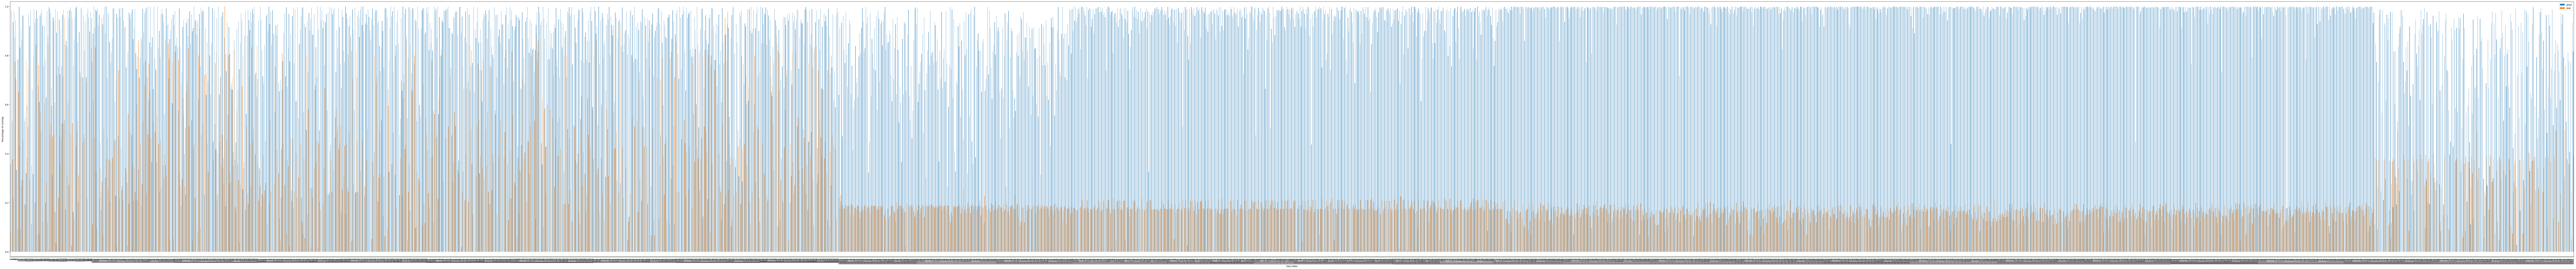

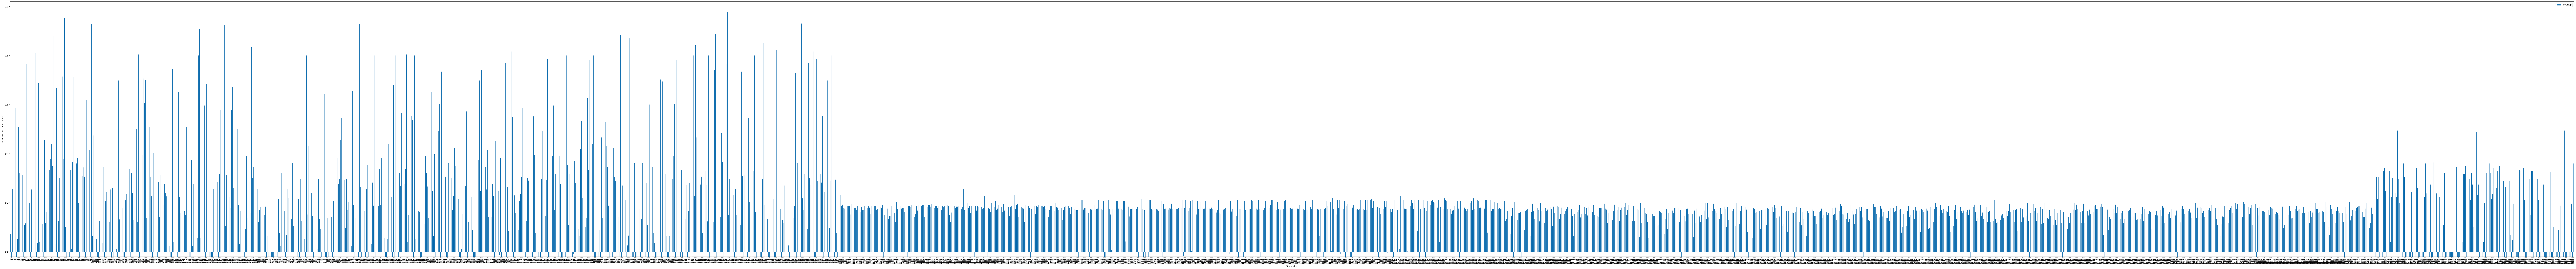

In [15]:
import matplotlib.pyplot as plt

def plot_overlap_scores(df):
    plt.rcParams['figure.figsize'] = (200, 20)
    ax = df.plot(x='index', y=['min_pred', 'overlap_real'], kind='bar', ylim=(-0.02,1.02)) # ylim to force y-axis scale to be the same as it is for the other graphs
    ax.legend(['pred', 'real'])
    ax.set_xlabel(f'Seq index')
    ax.set_ylabel('Percentage of overlap')
    plt.show()
        
    ax = df.plot(x='index', y=['overlap'], kind='bar', ylim=(-0.02,1.02))
    ax.set_xlabel(f'Seq index')
    ax.set_ylabel('Intersection over union')
    plt.show()

df_reduced['index'] = df_reduced.index
plot_overlap_scores(df_reduced)

### Checks drops in prediction score:

In [16]:
pred_mean = df_reduced['min_pred'].mean()
print(f'Mean: {pred_mean}')
pred_med = df_reduced['min_pred'].median()
print(f'Med: {pred_med}')
pred_max = df_reduced['min_pred'].max()
print(f'Max: {pred_max}')
pred_min = df_reduced['min_pred'].min()
print(f'Min: {pred_min}')

Mean: 0.8874365675610218
Med: 0.9718170464038848
Max: 0.9999837875366212
Min: 0.0280780084431171


Check average difference in prediction score drop:

In [17]:
df_reduced['drop_difference'] = df_reduced.apply(lambda row: row['sequence_pred'] - row['min_pred'], axis = 1)
df_reduced

/tmp/ipykernel_4626/1061911755.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced['drop_difference'] = df_reduced.apply(lambda row: row['sequence_pred'] - row['min_pred'], axis = 1)


,id,sequence_str,sequence_pred,patched_starts,patched_preds,min_start,min_pred,knot_start,knot_end,family,min_end,overlap_pred,overlap_real,overlap,index,drop_difference
0,A0A533UME0,MKLSIAIPDSSVSDESTQLGKSMKISLIARACAIFRVQTVYIYHES...,0.654722,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.6547220349311829, 0.9134407639503479, 0.887...",229.0,0.357207,38,246,SPOUT,269.0,0.425,0.081731,0.073593,0,0.297515
1,A0A2S2NXP0,MKAIGSSFSVNFRRILCHNVTARTYVSDTKGSDKKQSNDDILNSIK...,0.992380,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9923796653747559, 0.9998968839645386, 0.999...",335.0,0.984055,95,307,SPOUT,375.0,0.000,0.000000,-0.100000,1,0.008325
2,A0A154BTR5,MSSVYLGLLHHPIYNKNDEIVATAVTNFDIHDIARAARTYDISRYF...,0.977540,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9775395393371582, 0.9376558661460876, 0.919...",138.0,0.533647,108,156,SPOUT,178.0,0.450,0.375000,0.257143,2,0.443892
3,A0A5J4Z539,MNAIAFGCSSQTWCTVRARHETRIRVRTCASGNARVGEGSNDRKAA...,0.974824,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.974823534488678, 0.9995740056037903, 0.9993...",337.0,0.935046,287,351,SPOUT,377.0,0.350,0.218750,0.155556,3,0.039778
4,A0A1Q9VZN3,MRWGRAVPDAPVTVTDPTDTRLDDIRDLNSSDRRPDLPGGKGLVVA...,0.994303,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9943029880523682, 0.9995948672294617, 0.999...",147.0,0.979765,219,261,SPOUT,187.0,0.000,0.000000,-0.280702,4,0.014538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3460,A0A2L0EHF4,MRHFLTTMDYTRAEIEGLLERAQRFKRRPVDPRLKDRTLALVFFNP...,0.959550,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9595502614974976, 0.9151450991630554, 0.964...",55.0,0.407665,168,250,ATCase/OTCase,95.0,0.000,0.000000,-0.374359,3460,0.551885
3461,A0A3C0HI14,MKHFLNTQDWSRAELDAVLDEAAVLKASKFGQQMAGKSIALVFFNP...,0.991351,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9913514852523804, 0.9928185939788818, 0.994...",20.0,0.772005,169,251,ATCase/OTCase,60.0,0.000,0.000000,-0.471861,3461,0.219346
3462,A0A7C1D2E0,MNTALKGKHFITTQDWSIQELKTIFELAKQLKLDFARGKFSRQHAG...,0.846104,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.8461039662361145, 0.8760170340538025, 0.955...",142.0,0.050567,162,244,ATCase/OTCase,182.0,0.500,0.243902,0.196078,3462,0.795537
3463,A0A372NXM6,MKLFSSVNDVTDVKALVAQALAEKNDPFAHQHLGKNKTISLVFLNP...,0.996686,"['-1', '0', '1', '2', '3', '4', '5', '6', '7',...","[0.9966860413551331, 0.9963493347167969, 0.997...",111.0,0.933425,170,238,ATCase/OTCase,151.0,0.000,0.000000,-0.149606,3463,0.063261


In [18]:
pred_mean = df_reduced['drop_difference'].mean()
print(f'Mean: {pred_mean}')
pred_med = df_reduced['drop_difference'].median()
print(f'Med: {pred_med}')
pred_max = df_reduced['drop_difference'].max()
print(f'Max: {pred_max}')
pred_min = df_reduced['drop_difference'].min()
print(f'Min: {pred_min}')

Mean: 0.09206422461602692
Med: 0.017427504062652532
Max: 0.869389146566391
Min: 6.67572021484375e-06


In [19]:
df_reduced.to_csv(OUTPUT_REDUCED, index=False)